In [ ]:
import numpy as np
np.random.seed(123)
import pandas as pd
import pandas.testing as tm
import pandas.util.testing as tm
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVR
import json
from tqdm import tqdm_notebook

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


* Loading the DataSets

In [ ]:
# loading the train and test dataset
df_1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/22 Case Study 1/mercedes-benz-greener-manufacturing/train.csv/train.csv')

In [ ]:
# converting categorical features to numerical features
x_dummies=pd.get_dummies(df_1, prefix_sep='_', drop_first=True)
x_dummies.head()
#https://pandas.pydata.org/pandas-docs/version/0.21.1/generated/pandas.get_dummies.html
#https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# creating a list of columns which have only zeros
zeros=[]
for i,j in x_dummies.any().items():#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html
    if j==False:
        zeros.append(i)

In [ ]:
zeros # 'X339' is missing in my code
# we need to drop these columns

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [ ]:
#https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
# to delete columns with high correlation

*   Dropping columns with only zeros

In [ ]:
x_dummies = x_dummies.drop(zeros, axis=1)

*   Dropping outliers => considering only IQR

In [ ]:
x_filtered= x_dummies[x_dummies ['y']>70]#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
x_filtered= x_filtered[x_filtered['y']<150]
x_filtered.describe()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X5_u,X5_v,X5_w,X5_x,X5_y,X6_b,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l,X8_b,X8_c,X8_d,X8_e,X8_f,X8_g,X8_h,X8_i,X8_j,X8_k,X8_l,X8_m,X8_n,X8_o,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,...,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.00000,4194.000000,4194.000000,4194.00000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000
mean,4209.773724,100.439938,0.013352,0.074392,0.057940,0.428231,0.000477,0.002623,0.007630,0.007868,0.099666,0.142823,0.002623,0.086791,0.020744,0.001907,0.005007,0.682165,0.032666,0.043157,0.004530,0.231998,0.011206,0.000238,0.005484,0.231998,0.004530,0.231998,0.033381,0.000238,0.000715,0.011445,0.000238,0.072246,0.011445,0.253219,0.597282,0.012876,0.022413,0.122556,...,0.000238,0.054840,0.055079,0.000477,0.000238,0.006676,0.008822,0.148546,0.002861,0.004769,0.24702,0.045303,0.116357,0.24702,0.010014,0.113495,0.045303,0.023844,0.024082,0.053410,0.057940,0.030758,0.027897,0.056509,0.065808,0.041965,0.024082,0.036719,0.057701,0.038865,0.023605,0.027659,0.051741,0.060563,0.028135,0.028374,0.046257,0.046495,0.024797,0.027659
std,2437.897217,11.994753,0.114792,0.262439,0.233658,0.494881,0.021835,0.051152,0.087026,0.088365,0.299590,0.349934,0.051152,0.281562,0.142543,0.043638,0.070592,0.465690,0.177781,0.203234,0.067163,0.422158,0.105278,0.015441,0.073860,0.422158,0.067163,0.422158,0.179651,0.015441,0.026739,0.106380,0.015441,0.258926,0.106380,0.434907,0.490503,0.112751,0.148040,0.327966,...,0.015441,0.227695,0.228161,0.021835,0.015441,0.081445,0.093522,0.355682,0.053420,0.068899,0.43133,0.207992,0.320690,0.43133,0.099581,0.317235,0.207992,0.152580,0.153322,0.224876,0.233658,0.172683,0.164697,0.230930,0.247976,0.200532,0.153322,0.188094,0.233206,0.193296,0.151834,0.164012,0.221529,0.238555,0.165379,0.166058,0.210065,0.210580,0.155526,0.164012
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2096.250000,90.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

In [ ]:
print(x_filtered.shape)
y=x_filtered['y']
x_filtered=x_filtered.drop(['y'], axis=1)
print(x_filtered.shape, y.shape)
print(type(x_filtered), type(y))

(4194, 545)
(4194, 544) (4194,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/22 Case Study 1/inf_indices.txt', 'r') as f:
    checc=json.loads(f.read())


In [ ]:
inf_indices=checc

In [ ]:
print(x_filtered.shape)
x_filtered = x_filtered.drop(inf_indices, axis=1)
#x_dummies_2= x_dummies_2.drop(inf_indices, axis=1)
print(x_filtered.shape)
#print(x_dummies_2.shape)

(4194, 544)
(4194, 188)


*   Splitting data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=42)

https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be


*    From the above link we have learned that apart from SVD we can also add features using PCA, ICA, LDA, LLE


*   Adding SVD features


In [ ]:
from sklearn.decomposition import TruncatedSVD
tsvd= TruncatedSVD(n_components=2, random_state=42)
tsvd_train= tsvd.fit_transform(x_train)
tsvd_test=  tsvd.transform(x_test)

In [ ]:
tsvd_train.shape

(3355, 2)

*    PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_train= pca.fit_transform(x_train)
pca_test= pca.transform(x_test)

In [ ]:
pca_train.shape

(3355, 2)

*    ICA

In [ ]:
from sklearn.decomposition import FastICA
ica=FastICA(n_components=2, random_state=42)
ica_train= ica.fit_transform(x_train)
ica_test= ica.transform(x_test)

In [ ]:
ica_train.shape

(3355, 2)

*    adding all these new features to the dataframe

In [ ]:
for i in range(0, tsvd_train.shape[1]):
    x_train['tsvd_'+str(i)]= tsvd_train[:, i]
    x_test['tsvd_'+str(i)]= tsvd_test[:, i]
    x_train['pca_'+str(i)]= pca_train[:, i]
    x_test['pca_'+str(i)]= pca_test[:, i]
    x_train['ica_'+str(i)]= ica_train[:, i]
    x_test['ica_'+str(i)]= ica_test[:, i]

*    Two way and Three way Feature interaction

In [ ]:
x_train['X64 + X218']=x_train['X64']+x_train['X218']
x_test['X64 + X218']=x_test['X64']+x_test['X218']

x_train['X218 + X224 + X273']=x_train['X218']+x_train['X224'] + x_train['X273']
x_test['X218 + X224 + X273']=x_test['X218']+x_test['X224'] + x_test['X273']

x_train['X64 + X224 + X273']=x_train['X64']+x_train['X224'] + x_train['X273']
x_test['X64 + X224 + X273']=x_test['X64']+x_test['X224'] + x_test['X273']


x_train['X314 + X315']=x_train['X314']+x_train['X315']
x_test['X314 + X315']=x_test['X314']+x_test['X315']

x_train['X314 + X315 + X29']=x_train['X314']+x_train['X315'] + x_train['X29']
x_test['X314 + X315 + X29']=x_test['X314']+x_test['X315'] + x_test['X29']

x_train['X314 + X315 + X118']=x_train['X314']+x_train['X315'] + x_train['X118']
x_test['X314 + X315 + X118']=x_test['X314']+x_test['X315'] + x_test['X118']

x_train['X127 + X189']=x_train['X127']+x_train['X189']
x_test['X127 + X189']=x_test['X127']+x_test['X189']

x_train['X118 + X54']=x_train['X118']+x_train['X54']
x_test['X118 + X54']=x_test['X118']+x_test['X54']


In [ ]:
print(x_train.shape, x_test.shape)

(3355, 202) (839, 202)


# 1:    RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, bootstrap
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in a Random forest
n_estimators=[int(x) for x in np.linspace (start=100, stop=1000, num=10)]

# Number of features to consider at every split
max_features=['auto', 'sqrt']

# Maximun no of levels in a tree
max_depth=[int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = np.arange(50,250,20)

# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(5,50,5)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': array([ 50,  70,  90, 110, 130, 150, 170, 190, 210, 230]), 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]), 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 150,
 'n_estimators': 200}

In [ ]:
 best_rf=rf_random.best_estimator_
best_rf

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=150, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#temp
best_rf= RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=150, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# fitting the best model on to the dataset
best_rf.fit(x_train, y_train)
y_train_pred=best_rf.predict(x_train)
y_test_pred=best_rf.predict(x_test)

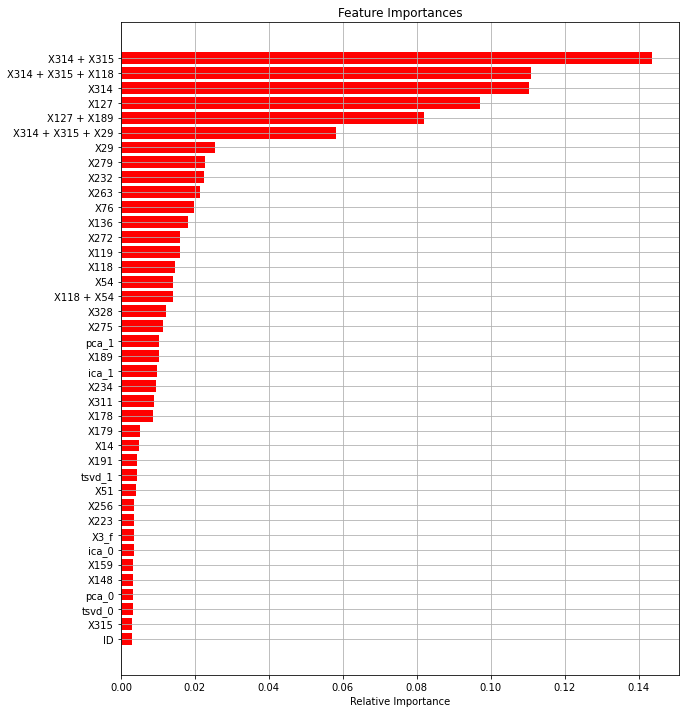

In [ ]:
features = x_train.columns
importances = best_rf.feature_importances_
indices = (np.argsort(importances))[-40:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.6574681408333823
test r2_score 0.6483743021527534


# 2:     XGBoostRegressor

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred=xgb_model.predict(x_train)
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators=[50, 100, 150, 200, 250, 300]
hyperparameters= dict(learning_rate=learning_rate, n_estimators=n_estimators)


[05:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(xgb_model, hyperparameters, n_iter=10, random_state=41)
rsearch.fit(x_train, y_train)

In [ ]:
print(rsearch.best_params_)

{'n_estimators': 150, 'learning_rate': 0.1}


In [ ]:
from sklearn.metrics import r2_score
train_r2=[]
cv_r2=[]
dict_cv_r2={}
learning_rate=[0.3, 0.2, 0.1, 0.01, 0.001]
n_estimators=[50, 100, 150, 200, 250, 300]
for i in tqdm_notebook(learning_rate):
    for j in tqdm_notebook(n_estimators):
        xb=xgb.XGBRegressor(learning_rate=i,n_estimators=j)
        xb.fit(x_train,y_train)
        y_cap_train=xb.predict(x_train)
        y_cap_cv=xb.predict(x_test)
        train_r2.append(r2_score(y_train,y_cap_train))
        k=r2_score(y_test,y_cap_cv)
        dict_cv_r2[k]=i,j
        cv_r2.append(r2_score(y_test,y_cap_cv)) 
maximum_auc_score=max(cv_r2)
print(maximum_auc_score)

[05:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



[05:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



[05:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



[05:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



[05:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6604956264525383


In [ ]:
print(dict_cv_r2)
dict_cv_r2[maximum_auc_score]

{0.6402537526049236: (0.3, 50), 0.6252262886435493: (0.3, 100), 0.6157867395052805: (0.3, 150), 0.6022101794445373: (0.3, 200), 0.5986576037823697: (0.3, 250), 0.5920276258487682: (0.3, 300), 0.6495058123974411: (0.2, 50), 0.6401937386689296: (0.2, 100), 0.6297822884109171: (0.2, 150), 0.61793390034962: (0.2, 200), 0.6106101680890954: (0.2, 250), 0.6065947849425557: (0.2, 300), 0.6604956264525383: (0.1, 50), 0.6551932464695924: (0.1, 100), 0.6510758493146287: (0.1, 150), 0.6476432584046412: (0.1, 200), 0.6424447767045449: (0.1, 250), 0.6376118929053608: (0.1, 300), -23.763886395441098: (0.01, 50), -8.212041981330602: (0.01, 100), -2.539177130594942: (0.01, 150), -0.4795579683228388: (0.01, 200), 0.2627329638286101: (0.01, 250), 0.5260536615591418: (0.01, 300), -59.95013183340117: (0.001, 50), -54.161392119137304: (0.001, 100), -48.92440388830799: (0.001, 150), -44.18663367933654: (0.001, 200), -39.90054617843785: (0.001, 250), -36.02313778578405: (0.001, 300)}


(0.1, 50)

In [ ]:
best_xgb=rsearch.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# fitting the best model on to the dataset
best_xgb.fit(x_train, y_train)
y_train_pred=best_xgb.predict(x_train)
y_test_pred=best_xgb.predict(x_test)

[05:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


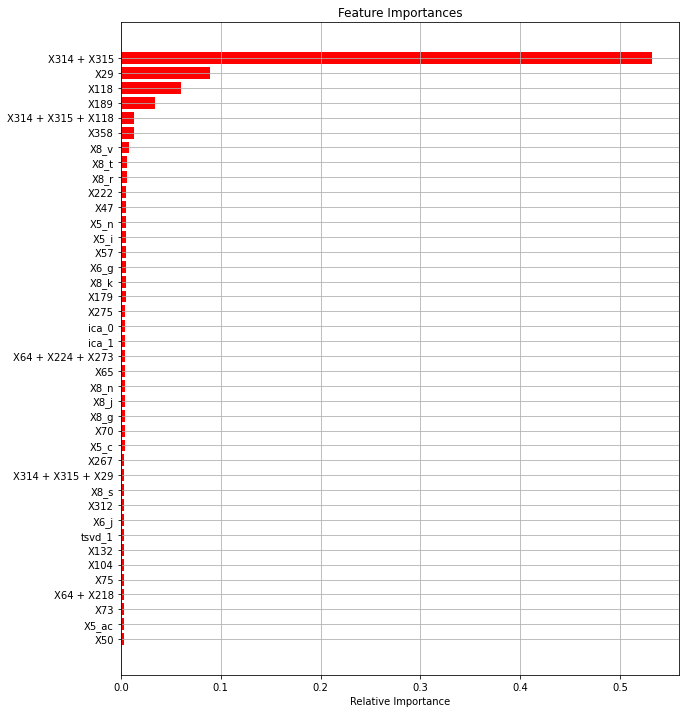

In [ ]:
import matplotlib.pyplot as plt
features = x_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-40:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.6931087582848501
test r2_score 0.6510758493146287


# 3:    DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
max_depth=[1, 5, 10, 50]
min_samples_split=[5, 10, 100, 500]
hyperparameters= dict(max_depth=max_depth, min_samples_split=min_samples_split)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(dt_model, hyperparameters, n_iter=10, random_state=41)
rsearch.fit(x_train, y_train)
print(rsearch.best_params_)

{'min_samples_split': 500, 'max_depth': 5}


In [ ]:
rsearch.best_params_

{'max_depth': 5, 'min_samples_split': 500}

In [ ]:
best_dt=rsearch.best_estimator_
best_dt

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=500,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# fitting the best model on to the dataset
best_dt.fit(x_train, y_train)
y_train_pred=best_dt.predict(x_train)
y_test_pred=best_dt.predict(x_test)

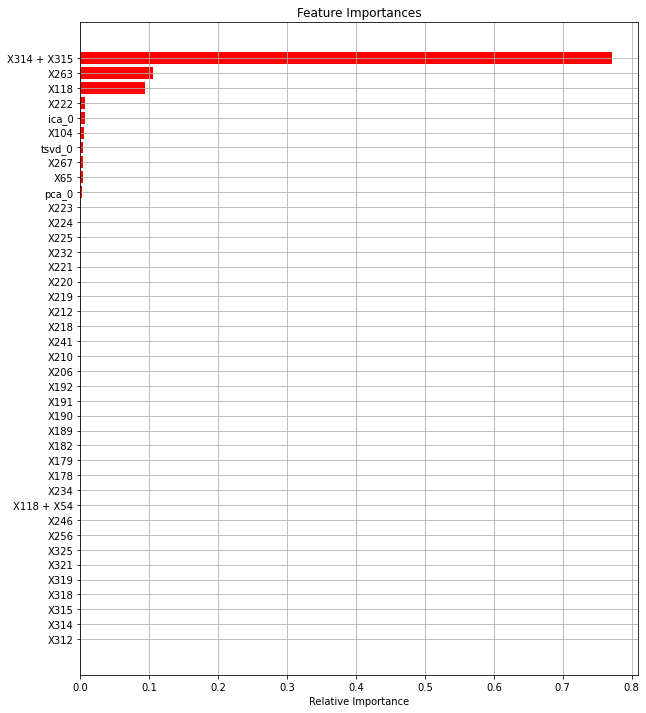

In [ ]:
import matplotlib.pyplot as plt
features = x_train.columns
importances = best_dt.feature_importances_
indices = (np.argsort(importances))[-40:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.6290528360587266
test r2_score 0.6554069343566447


# 4: Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
ridge_regressor= Ridge()
ridge_regressor

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
parameters= {'alpha': [10,20,  50, 100, 150, 200, 250, 300]}
ridge_grid_scv= GridSearchCV(ridge_regressor, parameters, scoring='r2', cv=5)
ridge_grid_scv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 20, 50, 100, 150, 200, 250, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(ridge_grid_scv.best_params_)
print(ridge_grid_scv.best_score_)

{'alpha': 50}
0.5954015864151923


In [ ]:
ridge_regressor= Ridge(alpha=50)
ridge_regressor

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_regressor.fit(x_train, y_train)
y_train_pred=ridge_regressor.predict(x_train)
y_test_pred =ridge_regressor.predict(x_test)

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.622606917016735
test r2_score 0.6398563894858129


# 5: Lasso Regressor

In [ ]:
lasso= Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
parameters= {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_grid_scv= GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_grid_scv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(lasso_grid_scv.best_params_)
print(lasso_grid_scv.best_score_)

{'alpha': 0.01}
0.596278101998697


In [ ]:
lasso_regressor= Lasso(alpha=0.01)
lasso_regressor

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
#https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
#https://alfurka.github.io/2018-11-18-grid-search/
lasso_regressor.fit(x_train, y_train)
y_train_pred=lasso_regressor.predict(x_train)
y_test_pred =lasso_regressor.predict(x_test)

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.6256643013649388
test r2_score 0.6463713208948576


# 6: AdaBoostRegressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
abr= AdaBoostRegressor()
abr

In [ ]:
parameters = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators' : [50, 100, 150, 200, 250, 300]}
gsearch = GridSearchCV(abr, parameters, scoring='r2')
gsearch.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
print(gsearch.best_estimator_)
print(gsearch.best_score_)

AdaBoostRegressor(base_estimator=None, learning_rate=0.0001, loss='exponential',
                  n_estimators=200, random_state=None)
0.6106137543959904


In [ ]:
abr= AdaBoostRegressor(base_estimator=None, learning_rate=0.0001, loss='exponential',
                  n_estimators=200, random_state=None)
abr

AdaBoostRegressor(base_estimator=None, learning_rate=0.0001, loss='exponential',
                  n_estimators=200, random_state=None)

In [ ]:
abr.fit(x_train, y_train)
y_train_pred=abr.predict(x_train)
y_test_pred =abr.predict(x_test)

In [ ]:
# checking r2 score
from sklearn.metrics import r2_score
print('train r2_score', r2_score(y_train, y_train_pred))
print('='*30)
print('test r2_score', r2_score(y_test, y_test_pred))

train r2_score 0.6134014860036547
test r2_score 0.653160564280501
